"This project performs exploratory data analysis (EDA) on a food order dataset.
We aim to find out popular food items,peak order times, and customer behaviour using Python and visualization tools."

In [1]:
import google.colab.files
uploaded=google.colab.files.upload()

Saving food_order.csv to food_order.csv


In [ ]:
import pandas as pd
df=pd.read_csv('food_order.csv',na_values=["Not given"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


In [ ]:
df.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1162.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.344234,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.741478,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,5.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


In [ ]:
#To check the missing values
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,736
food_preparation_time,0
delivery_time,0


In [ ]:
df['cuisine_type'].value_counts()

,count
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77
Indian,73
Middle Eastern,49
Mediterranean,46
Thai,19


In [ ]:
import pandas as pd
df=pd.read_csv('food_order.csv',na_values=["Not given"])
df['restaurant_name'].value_counts()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Rye House,1
Hiroko's Place,1
Frank Restaurant,1


In [ ]:
#To find the cuisine type which has highest delivery time
df.groupby('cuisine_type')['delivery_time'].mean().sort_values(ascending=False)

,delivery_time
cuisine_type,
Vietnamese,26.142857
French,25.333333
Italian,24.567114
Mexican,24.389610
American,24.193493
Japanese,24.131915
Indian,24.082192
Middle Eastern,24.081633
Chinese,23.855814


In [ ]:
#To find the cuisine type that has highest average cost of the order
df.groupby('cuisine_type')['cost_of_the_order'].mean().sort_values(ascending=False)

,cost_of_the_order
cuisine_type,
French,19.793889
Southern,19.300588
Thai,19.207895
Spanish,18.994167
Middle Eastern,18.820612
Mexican,16.933117
Indian,16.919726
Italian,16.418691
American,16.319829


In [ ]:
#To find the restaurant which has highest average rating
df.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False)

,rating
restaurant_name,
'wichcraft,5.0
67 Burger,5.0
Anjappar Chettinad,5.0
Asuka Sushi,5.0
Balade,5.0
...,...
Rohm Thai,NaN
Room Service,NaN
Spice Thai,NaN


In [ ]:
#To find top 3 restaurants with the longest preparation time
df.groupby('restaurant_name')['food_preparation_time'].mean().sort_values(ascending=False).head(3)

,food_preparation_time
restaurant_name,
Cipriani Le Specialita,35.0
Klong,35.0
Sushi Choshi,35.0


In [4]:
import pandas as pd
df=pd.read_csv('food_order.csv',na_values=["Not given"])
df.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


<Axes: xlabel='day_of_the_week'>

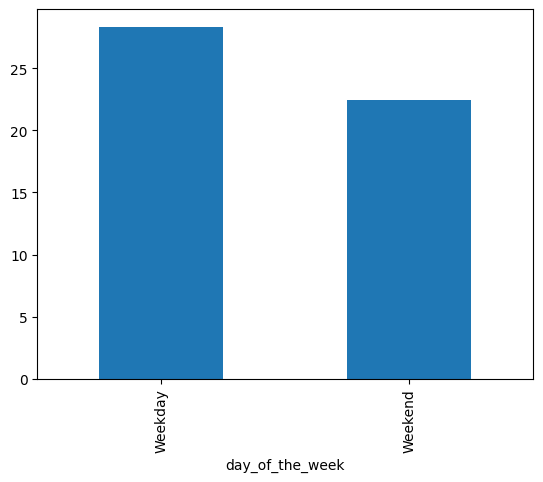

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('food_order.csv',na_values=["Not given"])
df.groupby('day_of_the_week')['delivery_time'].mean().plot(kind='bar')

<Axes: >

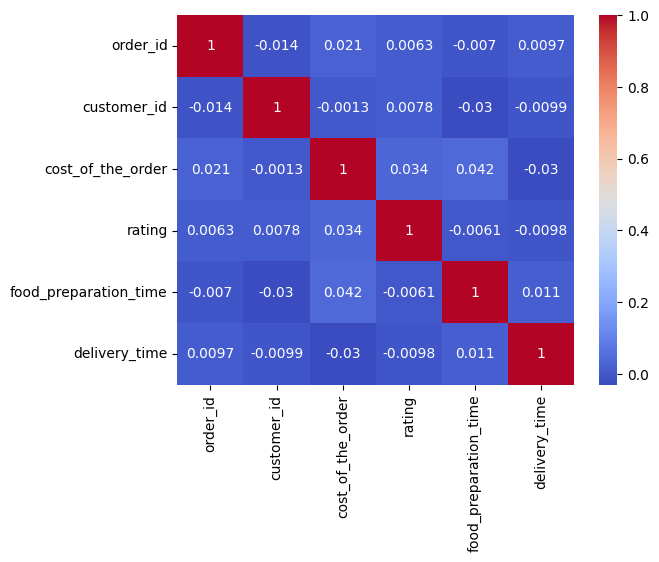

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('food_order.csv',na_values=["Not given"])
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

##Key Insights
1. 🥇 Shake Shack received the highest number of orders among all restaurants, indicating strong customer preference or popularity.


2. ⏱️ Vietnamese cuisine had the highest average delivery time, suggesting possible delays due to preparation or distance.


3. 💸 French food had the highest average cost per order, which may reflect premium pricing or upscale menu items.


4. 📅 Weekday deliveries showed a higher average delivery time compared to weekends, which could be due to traffic or increased workday demand.